<a href="https://colab.research.google.com/github/truonghuynh210962/Python-on-the-way/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Load Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Load Datasets**

In [12]:
dataset_names = np.array(sns.get_dataset_names()) #dataset list in seaborn

In [21]:
#load one of these datasets
def dataset(name = "penguins"):
  name = sns.load_dataset(dataset_names[dataset_names == name][0])
  return name

In [24]:
dataset().info() # penguins dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#**Relational Plots**

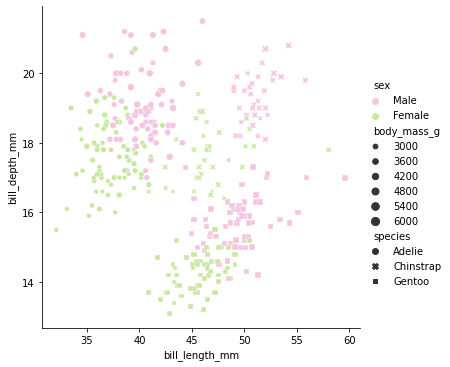

In [50]:
#kind = ("line", "scatter")
#palette @https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html
sns.relplot(data = dataset(), x = "bill_length_mm", y = "bill_depth_mm", hue = "sex", size= "body_mass_g", palette= "PiYG",kind = "scatter", style = "species")

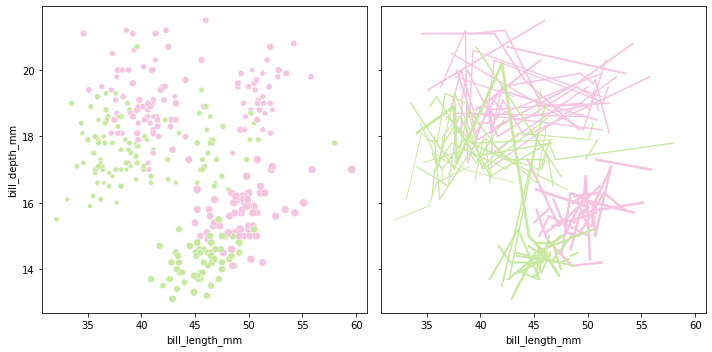

In [49]:
f, ax = plt.subplots(figsize =(10,5), nrows= 1, ncols = 2, sharex= True, sharey= True)
sns.scatterplot(data = dataset(), x = "bill_length_mm", y = "bill_depth_mm", hue = "sex", size= "body_mass_g", palette= "PiYG", legend = False, ax = ax[0])
sns.lineplot(data = dataset(), x = "bill_length_mm", y = "bill_depth_mm", hue = "sex", size= "body_mass_g", palette= "PiYG", legend = False, ax = ax[1])
plt.tight_layout()

#**Distribution plots**

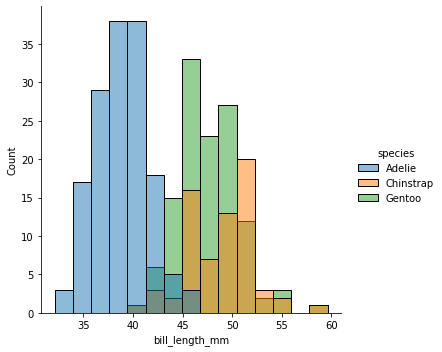

In [139]:
sns.displot(data= dataset(), x = "bill_length_mm", bins = 15, kind = "hist", color = 'g' , hue = "species")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


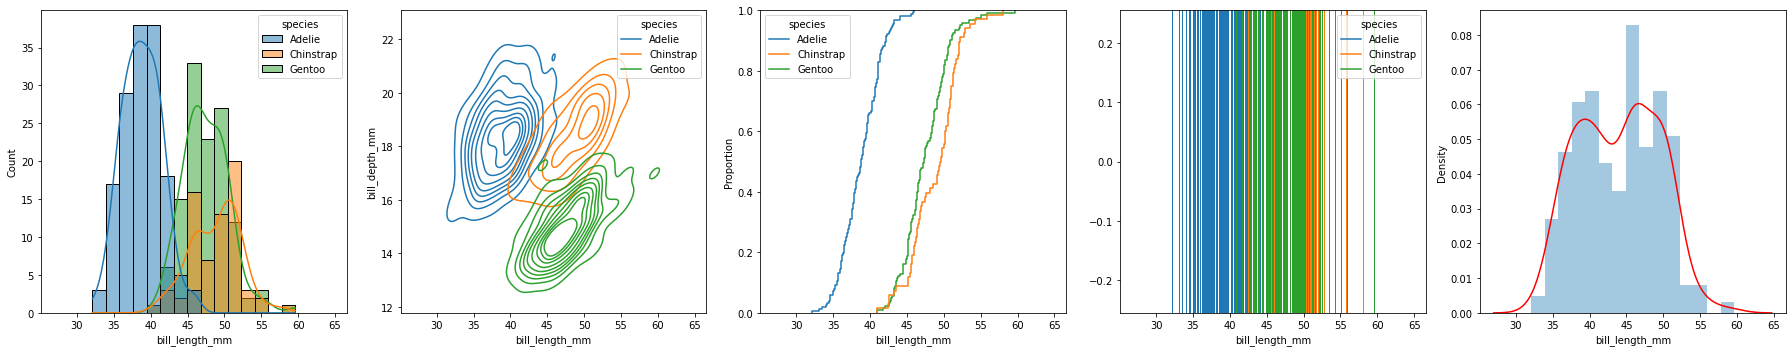

In [129]:
f, ax = plt.subplots(1,5,True,False,figsize = (25,5))
sns.histplot(data= dataset(), x = "bill_length_mm", bins = 15, color = 'b' , ax = ax[0], kde = True,hue = "species")
sns.kdeplot(data= dataset(), x = "bill_length_mm", y = "bill_depth_mm", color = 'y' , ax = ax[1], hue = "species")
sns.ecdfplot(data= dataset(),x="bill_length_mm",hue = "species",ax = ax[2])
sns.rugplot(data= dataset(),x="bill_length_mm",hue = "species",height=1,ax = ax[3])
sns.distplot(dataset()["bill_length_mm"], bins = 15, kde_kws= {'color':'r'}, label = "TEST DIST PLOT",norm_hist=True, ax = ax[4]) #will remove soon in libs
plt.tight_layout()

#**Categorical plots**

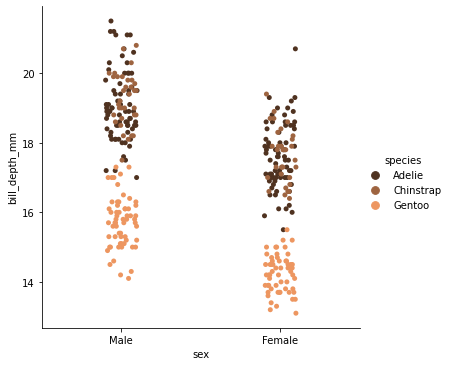

In [140]:
sns.catplot(data = dataset(), x = "sex", y = "bill_depth_mm", palette= "copper", hue = "species" )

#**Regression plots**

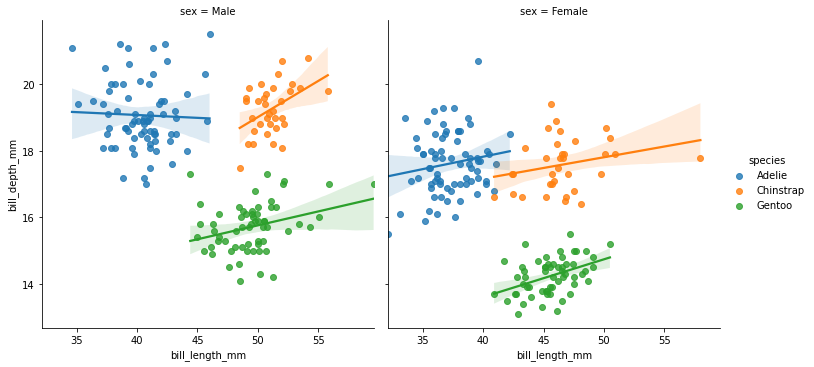

In [143]:
sns.lmplot(data = dataset(), x = "bill_length_mm", y = "bill_depth_mm", hue = "species", col = "sex")

#**Matrix plots**

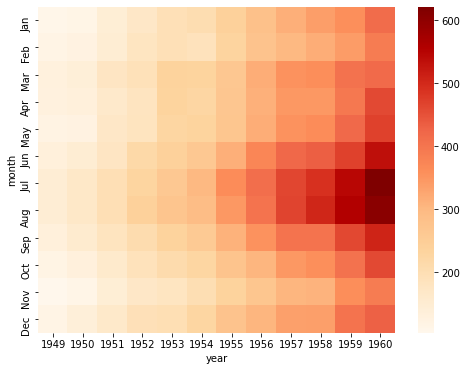

In [170]:
pivot = dataset("flights").pivot("month", "year", "passengers")
plt.figure(figsize=(8,6))
sns.heatmap(pivot,cmap = "OrRd")

#**Multi-plot grids**

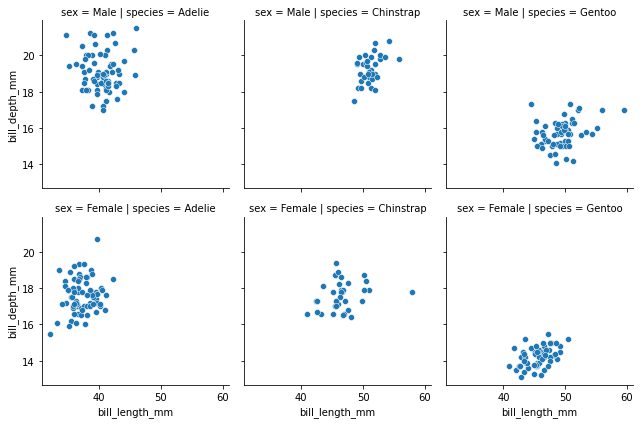

In [175]:
f = sns.FacetGrid(dataset(),row = "sex", col = "species")
f.map(sns.scatterplot,"bill_length_mm", "bill_depth_mm" )

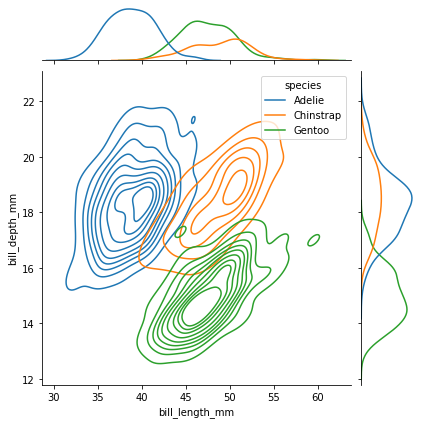

In [177]:
sns.jointplot(x="bill_length_mm",y="bill_depth_mm",data=dataset(),hue="species",kind="kde")

#**Themes**

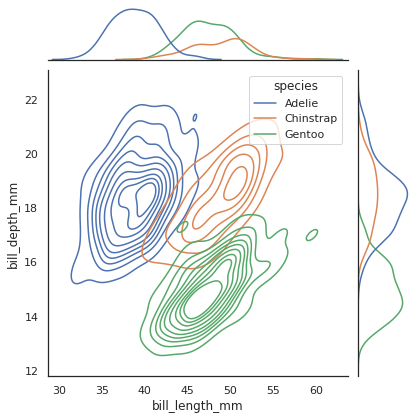

In [196]:
#context = @("talk","notebook","poster")
#style = @(darkgrid, whitegrid, dark, white, ticks)
sns.set_theme(context='notebook', style='white')
sns.jointplot(x="bill_length_mm",y="bill_depth_mm",data=dataset(),hue="species",kind="kde")